In [10]:
import numpy as np
import pandas as pd

np.random.seed(100)
n_samples = 250

x1_class0 = np.random.normal(loc=2, scale=1, size=n_samples//2)
x2_class0 = np.random.normal(loc=2, scale=1, size=n_samples//2)

x1_class1 = np.random.normal(loc=5, scale=1, size=n_samples//2)
x2_class1 = np.random.normal(loc=4, scale=3, size=n_samples//2)

x1 = np.concatenate((x1_class0, x1_class1))
x2 = np.concatenate((x2_class0, x2_class1))
labels = np.array([0] * (n_samples//2) + [1] * (n_samples//2))

dataset = np.dstack((x1, x2, labels))[0]



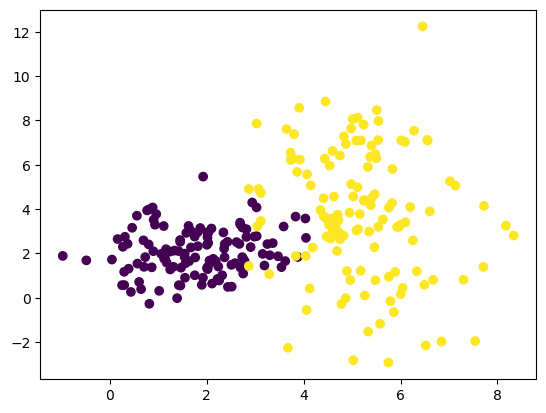

In [11]:
import matplotlib.pyplot as plt

plt.scatter(dataset[:, 0], dataset[:, 1], c=dataset[:, 2])

In [12]:
np.random.shuffle(dataset)

training_ratio = 0.70
training_thresh = int(training_ratio * n_samples)


training_data = dataset[:training_thresh]
test_data = dataset[training_thresh:]

test_data

array([[ 0.60300066,  0.71609519,  0.        ],
       [ 4.97882423,  7.63395552,  1.        ],
       [ 6.00339756,  0.16711276,  1.        ],
       [ 1.42117418,  0.57023734,  0.        ],
       [ 5.8231244 ,  4.27832927,  1.        ],
       [ 0.556783  ,  3.70362399,  0.        ],
       [ 2.00301743,  1.33806229,  0.        ],
       [ 7.29936947,  0.81559709,  1.        ],
       [ 2.10886347,  0.64149706,  0.        ],
       [ 4.82916959,  7.28124459,  1.        ],
       [ 3.02973269,  2.7796263 ,  0.        ],
       [ 4.04183166,  1.89028915,  1.        ],
       [ 6.4905331 ,  0.5873728 ,  1.        ],
       [ 6.55931486,  7.09384659,  1.        ],
       [ 1.54197301,  1.84273483,  0.        ],
       [ 2.67272081,  2.42967644,  0.        ],
       [ 2.01863895,  1.2955818 ,  0.        ],
       [ 5.53981292,  3.1983241 ,  1.        ],
       [ 5.1585986 ,  3.77454229,  1.        ],
       [ 1.92038875,  0.90595707,  0.        ],
       [ 5.63550117,  3.53545464,  1.   

In [53]:

def knn_predict(train, test, k):
  result = []

  for test_point in test:
    distances = np.linalg.norm(train - test_point, axis=1)
    k_nearest_indices = np.argsort(distances)[:k]
    predicted_label = np.argmax(np.bincount(k_nearest_indices))  # Находим наиболее часто встречающуюся метку
    result.append(predicted_label)

  return np.array(result)

k = 6
result = knn_predict(training_data, test_data, k)
print(f"knn res: {result}")

knn res: [16  0 30 42 15 24 39 30 18  0 17  8 30  6  1 17 39 76 15 18 15 21 81 17
 36 18 10 42 68 29 29 40 34 15 11  0 30 18 34  4 36 23 15  8 26 39 30  4
 26  0 17 11 12 21  0 20 15  0 81 76 42  3 40 11 17 34 21 39 15 17 18 40
  0  2 10]


ValueError: x and y must be the same size

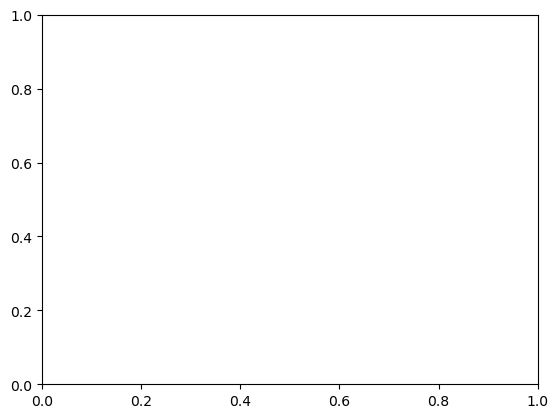